## Problem statement

### Spam filtering using Naive Bayes Classifiers in order to predict whether a new mail based on its content, can be categorized as spam or not-spam.

In [1]:
# Import the required libraries
import pandas as pd                                                         # importing pandas for analyzing, cleaning, exploring, and manipulating data.
import numpy as np                                                          # importing numpy for mathematical operations on arrays and matrices.
import matplotlib.pyplot as plt                                             # importing matplotlib for create plots and graphs.
import seaborn as sns                                                       # importing seaborn for data visualization.
from sklearn.metrics import accuracy_score,f1_score,classification_report   # to evaluate model performance
import warnings                                                             # we used to warnings for ignore warning messages.
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data=pd.read_csv("/content/spam.csv",sep=",",encoding='latin1')
data      # call variable

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# drop unknown column
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1,inplace=True)

In [4]:
data   # call variable

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
# rename of column
data.rename(columns={"v1":"Class","v2":"Message"},inplace=True)

In [6]:
# find the null value
data.isnull().sum()

,0
Class,0
Message,0


In [7]:
# find the duplicates value
data.duplicated().sum()

np.int64(403)

In [8]:
# drop the duplicate value
data.drop_duplicates()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# show the first five rows in dataset
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# show the last five rows in Dataset.
data.tail()

,Class,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [11]:
# Display summary information about the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
# Display statical information about the DataFrame.
data.describe()

,Class,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
pd.set_option('display.max_colwidth', None)
print(data.loc[11])

Class                                                                                                                                          spam
Message    SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
Name: 11, dtype: object


In [14]:
data.Class.value_counts()

,count
Class,
ham,4825
spam,747


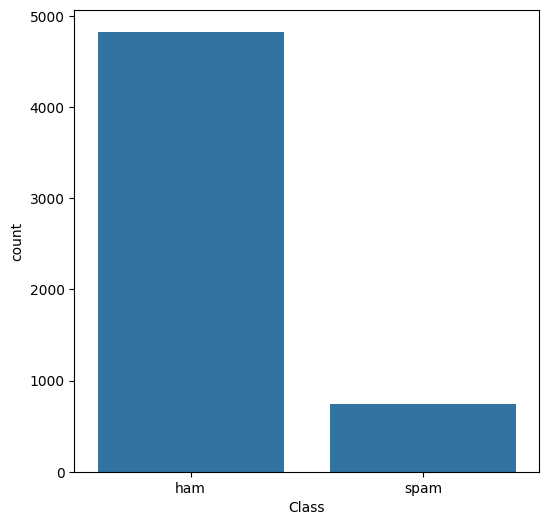

In [15]:
# # Creates a bar plot showing counts of each category in the Class column
plt.figure(figsize=(6,6))
sns.countplot(x="Class",data=data)
plt.show()

*  here,spam messages make up just 16.7% of the total data.

In [16]:
# Lets assign ham as 1 and spam has 0
data.loc[data["Class"]=="ham","Class"]=1
data.loc[data["Class"]=="spam","Class"]=0

In [17]:
data.head(3)

,Class,Message
0,1,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [18]:
# for help cleaning text
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
# Let's remove the punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text.lower()

In [20]:
text = []
for i in data["Message"]:
    t = remove_punct(i)
    text.append(t)

In [21]:
data["Text_clean"] = text
data

,Class,Message,Text_clean
0,1,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3,1,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,1,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though
...,...,...,...
5567,0,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate
5568,1,Will Ì_ b going to esplanade fr home?,will ì b going to esplanade fr home
5569,1,"Pity, * was in mood for that. So...any other suggestions?",pity was in mood for that soany other suggestions
5570,1,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free


## Model Creation

In [22]:
## Creating independent and dependent variable
x = data["Text_clean"].values
y = data["Class"].values

In [23]:
x

array(['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
       'ok lar joking wif u oni',
       'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
       ..., 'pity  was in mood for that soany other suggestions',
       'the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free',
       'rofl its true to its name'], dtype=object)

In [24]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=object)

In [25]:
y = y.astype("int")
y

array([1, 1, 0, ..., 1, 1, 1])

## Model Selection

In [26]:
# creating training and testing data

#import the train_test_split function from sklearn.model_selection.
from sklearn.model_selection import train_test_split                        # for splitting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

## test_size=0.2: 20% of the data will be used for testing
## random_state=33 : ensures reproducibility by fixing the seed for 33 number

In [27]:
len(x_train)

4457

In [28]:
len(y_test)

1115

In [29]:
# for converting text to numerical features
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words="english")                               ## object creation
x_train_cv=cv.fit_transform(x_train)                                   ## fitting and transforming the train data into vectors
x_test_cv = cv.transform(x_test)                                       ## Transform test data with the same vectors

In [30]:
## print feature names selected from the raw documents
print(cv.get_feature_names_out())

['008704050406' '0089my' '01223585236' ... 'ûïharry' 'ûò' 'ûówell']


In [31]:
list(cv.get_feature_names_out())

['008704050406',
 '0089my',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02073162414',
 '020903',
 '050703',
 '0578',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0796xxxxxx',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18s',
 '0870',
 '08700621170150p',
 '08701237397',
 '08701417012',
 '08701417012150p',
 '0870141

## Model Creation

#### <u> MultinominalNB </u>

In [32]:
from sklearn.naive_bayes import MultinomialNB                               # Naive Bayes classifier for multinomial models
mnb=MultinomialNB()                                                         #object creation for multinomial
mnb.fit(x_train_cv,y_train)                                                 # training the data

MultinomialNB()

In [33]:
# predicting the testing model
y_predict =mnb.predict(x_test_cv)

In [34]:
# predicting the training model
y_train_predict=mnb.predict(x_train_cv)

In [35]:
# Checking testing accuracy_score
accuracy_score(y_test,y_predict)

0.9820627802690582

In [36]:
# Checking training accuracy_score
accuracy_score(y_train,y_train_predict)

0.994166479694862

In [37]:
# Checking f1_score
f1_score(y_test,y_predict)

0.9897435897435898

In [38]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       145
           1       0.98      0.99      0.99       970

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#### <u>Random Forest</u>

In [39]:
# importing randomforest
from sklearn.ensemble import RandomForestClassifier

#object creation for random forest
rf=RandomForestClassifier()

# training the data
rf.fit(x_train_cv,y_train)

RandomForestClassifier()

In [40]:
# predicting the testing model
y_predict_rf=rf.predict(x_test_cv)

In [41]:
# predicting the training model
y_train_predict_rf=rf.predict(x_train_cv)

In [42]:
# Checking testing accuracy_score
accuracy_score(y_test,y_predict_rf)

0.9641255605381166

In [43]:
# Checking training accuracy_score
accuracy_score(y_train,y_train_predict_rf)

1.0

In [44]:
# Checking f1_score
f1_score(y_test,y_predict_rf)

0.9797160243407708

In [45]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       145
           1       0.96      1.00      0.98       970

    accuracy                           0.96      1115
   macro avg       0.96      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



### <u>SVM</u>

In [46]:
#importing svm from sklearn.svm
from sklearn.svm import SVC

#object creation for SVR
svm=SVC()

#train the mode
svm.fit(x_train_cv,y_train)

SVC()

In [47]:
# predicting the testing model
y_predict_svm=svm.predict(x_test_cv)

In [48]:
# predicting the training model
y_train_predict_svm=svm.predict(x_train_cv)

In [49]:
# Checking testing accuracy_score
accuracy_score(y_test,y_predict_svm)

0.9713004484304932

In [50]:
# Checking training accuracy_score
accuracy_score(y_train,y_train_predict_svm)

0.9952883105227731

In [51]:
# Checking f1_score
f1_score(y_test,y_predict_svm)

0.9837728194726166

In [52]:
print(classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       145
           1       0.97      1.00      0.98       970

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



#### <u>LogisticRegression</u>

In [53]:
#import the LogisticRegression function from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

#object creation for LogisticRegression
lr=LogisticRegression()

# training the model
lr.fit(x_train_cv,y_train)

LogisticRegression()

In [54]:
# predicting the testing model
y_predict_lr=lr.predict(x_test_cv)

In [55]:
# predicting the training model
y_train_predict_lr=lr.predict(x_train_cv)

In [56]:
# Checking testing accuracy_score
accuracy_score(y_test,y_predict_lr)

0.9721973094170404

In [57]:
# Checking training accuracy_score
accuracy_score(y_train,y_train_predict_lr)

0.9952883105227731

In [58]:
# Checking f1_score
f1_score(y_test,y_predict_lr)

0.9842559674961909

In [59]:
print(classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       145
           1       0.97      1.00      0.98       970

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### <u> CNN </u>

In [60]:
x_train_cv = x_train_cv.toarray().reshape(x_train_cv.shape[0], x_train_cv.shape[1], 1)
x_test_cv = x_test_cv.toarray().reshape(x_test_cv.shape[0], x_test_cv.shape[1], 1)


In [61]:
x_train_cv.shape

(4457, 8121, 1)

In [62]:
# import tensorflow
import tensorflow as tf

In [63]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8121, 1)),  # Corrected kernel_size
    tf.keras.layers.MaxPool1D(2),
    tf.keras.layers.Conv1D(filters=128,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])

In [64]:
# complie the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [65]:
# Train the model
model.fit(x_train_cv, y_train, epochs=10, batch_size=32, validation_data=(x_test_cv, y_test),verbose=1)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9350 - loss: 0.2171 - val_accuracy: 0.9794 - val_loss: 0.0799
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.9924 - loss: 0.0186 - val_accuracy: 0.9830 - val_loss: 0.0920
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9848 - val_loss: 0.1014
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 1.0000 - loss: 8.9267e-04 - val_accuracy: 0.9839 - val_loss: 0.1139
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 1.0000 - loss: 2.0987e-04 - val_accuracy: 0.9830 - val_loss: 0.1350
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 1.0000 - loss: 4.6602e-05 - val_accuracy: 0.9830 - val_loss: 0.1384
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 1.0000 - loss: 4.3594e-05 - val_accuracy: 0.9830 - val_loss: 0.1420
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 1.0000 - loss: 2

In [66]:
cnn_model=model.predict(x_test_cv)

35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 301ms/step


In [67]:
# checking testing accuracy
score = model.evaluate(x_test_cv, y_test, verbose=0)
accuracy = 100*score[1]

# checking traning accuracy
score1 = model.evaluate(x_train_cv, y_train, verbose=0)
accuracy1 = 100*score1[1]

# print test and train accuracy
print('Train accuracy: %.4f%%' % accuracy1)
print('Test accuracy: %.4f%%' % accuracy)

Train accuracy: 100.0000%
Test accuracy: 98.2063%


In [69]:
try:
    msg = input("Enter Message: ")  # to get the input message
    msgInput = cv.transform([msg])
    predict = mnb.predict(msgInput)
    if predict[0] == 0:
        print("------------------------MESSAGE-SENT-[CHECK-SPAM-FOLDER]---------------------------")
    else:
        print("------------------------MESSAGE-SENT-SUCCESSFULLY---------------------------")
except KeyboardInterrupt:
    print("\n[Interrupted by user. Exiting input...]")


Enter Message: SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
------------------------MESSAGE-SENT-[CHECK-SPAM-FOLDER]---------------------------


In [70]:
import pickle                             #Importing the pickle module
with open("spam.pkl","wb") as f:          #Open the file "spam.pkl" in write-binary mode
   pickle.dump(mnb,f)                      #save it to the file

In [71]:
with open("spam.pkl","rb") as f:   #Open the file "spam.pkl" in read-binary mode
  prediction=pickle.load(f)

In [72]:
prediction                                 #call file

MultinomialNB()